# Convert Norway dataset to the standard format of MBM

In [1]:
# Import libraries
import pandas as pd
import massbalancemachine as mbm

In [6]:
# Get filepath and filename of raw data
filepath = 'C:/Users/kasj/MassBalanceMachine/regions/Norway/data/'
filename = '2023-08-28_stake_mb_norway_cleaned_ids_latlon_wattributes_climate.csv'

# Read DataFrame
data = pd.read_csv(filepath + filename)

C:\Users\kasj\AppData\Local\Temp\ipykernel_31008\3305887633.py:4: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filepath + filename)


In [11]:
# Drop columns not needed for MBM
drop_cols = ['GLIMSID','BREID', 'utm_zone', 'utm_east_approx', 'utm_north_approx', 'altitude_approx', 'location_description', 'location_id', 'stake_no',
             'utm_east', 'utm_north', 'stake_remark', 'flag_correction', 'approx_loc', 'approx_altitude', 'diff_north', 'diff_east', 'diff_altitude',
             'diff_netto', 'lat_approx', 'lon_approx', 'topo', 'slope_factor', 'dis_from_border']

data = data.drop(columns=drop_cols)

In [14]:
# Rename columns in WGMS format
data = data.rename(columns={'RGIID':'RGIId', 'altitude':'POINT_ELEVATION', 'lat':'POINT_LAT', 'lon':'POINT_LON', 'altitude_climate':'ALTITUDE_CLIMATE'})

In [18]:
# Get hydrological year from current year
data['YEAR']=pd.to_datetime(data['dt_curr_year_max_date'].astype('string'), format="%d.%m.%Y %H:%M")
data['YEAR'] = data.YEAR.dt.year.astype('Int64')

In [27]:
# Get separate dataframes for annual, winter and summer mass balance
data_annual = data[data['balance_netto'].notna()]
data_winter = data[data['balance_winter'].notna()]
data_summer = data[data['balance_summer'].notna()]

In [30]:
# Align dataset names
data_annual = data_annual.drop(columns=['balance_winter', 'balance_summer', 'dt_curr_year_max_date'])
data_annual = data_annual.rename(columns={'balance_netto':'POINT_BALANCE','dt_prev_year_min_date':'FROM_DATE','dt_curr_year_min_date':'TO_DATE'})

data_winter = data_winter.drop(columns=['balance_summer', 'balance_netto', 'dt_curr_year_min_date'])
data_winter = data_winter.rename(columns={'balance_winter':'POINT_BALANCE','dt_prev_year_min_date':'FROM_DATE','dt_curr_year_max_date':'TO_DATE'})

data_summer = data_summer.drop(columns=['balance_winter', 'balance_netto', 'dt_prev_year_min_date'])
data_summer = data_summer.rename(columns={'balance_summer':'POINT_BALANCE', 'dt_curr_year_max_date':'FROM_DATE', 'dt_curr_year_min_date':'TO_DATE'})

In [31]:
data_annual


,RGIId,POINT_ELEVATION,POINT_BALANCE,FROM_DATE,TO_DATE,POINT_LAT,POINT_LON,aspect,slope,u10_oct,...,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep,ALTITUDE_CLIMATE,YEAR
0,RGI60-08.01258,471.0,-4.92,25.09.2012 00:00,07.11.2013 00:00,70.125889,21.777016,0.629597,0.278773,-0.141265,...,0.005116,0.002688,0.002334,0.001159,0.003054,0.003977,0.004691,0.001449,341.227919,2013
1,RGI60-08.01258,439.0,-2.67,07.11.2013 00:00,24.09.2014 00:00,70.125784,21.776300,0.585924,0.296590,0.548836,...,0.001831,0.004597,0.005634,0.002244,0.003412,0.000891,0.002129,0.004860,341.227919,2014
2,RGI60-08.01258,444.0,-3.41,24.09.2014 00:00,23.09.2015 00:00,70.125732,21.775903,0.663261,0.302508,-0.709114,...,0.004949,0.003286,0.003739,0.004709,0.005111,0.001253,0.002506,0.003256,341.227919,2015
3,RGI60-08.01258,444.0,-3.59,23.09.2015 00:00,22.09.2016 00:00,70.125732,21.775903,0.663261,0.302508,0.841615,...,0.002495,0.002263,0.001256,0.002129,0.003969,0.003559,0.002119,0.002851,341.227919,2016
4,RGI60-08.01258,468.0,-2.46,22.09.2016 00:00,29.09.2017 00:00,70.125536,21.773523,0.836757,0.309196,0.955584,...,0.003314,0.004417,0.002704,0.003991,0.001780,0.004257,0.005193,0.000710,341.227919,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4166,RGI60-08.02969,1078.0,-2.07,01.10.2012 00:00,12.10.2012 00:00,59.938030,6.347331,2.906044,0.131717,-0.331500,...,0.011964,0.007288,0.003555,0.005019,0.004730,0.007226,0.005739,0.011397,917.419759,2012
4167,RGI60-08.02969,1078.0,-3.15,12.10.2012 00:00,24.09.2013 00:00,59.937895,6.347288,2.906044,0.131717,-0.594287,...,0.002572,0.000807,0.009360,0.006135,0.006760,0.005158,0.008218,0.005461,917.419759,2013
4168,RGI60-08.02969,1079.0,-2.61,14.10.2014 00:00,14.10.2015 00:00,59.938150,6.347017,2.906044,0.131717,-0.789949,...,0.008543,0.010311,0.006261,0.008175,0.005974,0.006563,0.008015,0.003896,917.419759,2015
4169,RGI60-08.02969,1078.0,-2.66,14.10.2015 00:00,06.10.2016 00:00,59.938029,6.347241,2.906044,0.131717,-0.702830,...,0.008916,0.003751,0.004573,0.004449,0.005235,0.008926,0.011151,0.009556,917.419759,2016


In [19]:
list(data.columns)

['RGIId',
 'POINT_ELEVATION',
 'balance_winter',
 'balance_summer',
 'balance_netto',
 'dt_prev_year_min_date',
 'dt_curr_year_max_date',
 'dt_curr_year_min_date',
 'POINT_LAT',
 'POINT_LON',
 'aspect',
 'slope',
 'u10_oct',
 'u10_nov',
 'u10_dec',
 'u10_jan',
 'u10_feb',
 'u10_mar',
 'u10_apr',
 'u10_may',
 'u10_jun',
 'u10_jul',
 'u10_aug',
 'u10_sep',
 'v10_oct',
 'v10_nov',
 'v10_dec',
 'v10_jan',
 'v10_feb',
 'v10_mar',
 'v10_apr',
 'v10_may',
 'v10_jun',
 'v10_jul',
 'v10_aug',
 'v10_sep',
 'd2m_oct',
 'd2m_nov',
 'd2m_dec',
 'd2m_jan',
 'd2m_feb',
 'd2m_mar',
 'd2m_apr',
 'd2m_may',
 'd2m_jun',
 'd2m_jul',
 'd2m_aug',
 'd2m_sep',
 't2m_oct',
 't2m_nov',
 't2m_dec',
 't2m_jan',
 't2m_feb',
 't2m_mar',
 't2m_apr',
 't2m_may',
 't2m_jun',
 't2m_jul',
 't2m_aug',
 't2m_sep',
 'fal_oct',
 'fal_nov',
 'fal_dec',
 'fal_jan',
 'fal_feb',
 'fal_mar',
 'fal_apr',
 'fal_may',
 'fal_jun',
 'fal_jul',
 'fal_aug',
 'fal_sep',
 'asn_oct',
 'asn_nov',
 'asn_dec',
 'asn_jan',
 'asn_feb',
 'asn_m

In [4]:
import xarray as xr

filepath_oggm = 'C:/Users/kasj/ML_MB_Norway/Data/oggm_data/per_glacier/train/RGI60-08.01126/gridded_data.nc'

with xr.open_dataset(filepath_oggm) as ds_grid_out:
    ds_grid = ds_grid_out

In [5]:
ds_grid

<xarray.Dataset> Size: 759kB
Dimensions:                  (x: 108, y: 108)
Coordinates:
  * x                        (x) float32 432B -4.117e+03 -4.016e+03 ... 6.69e+03
  * y                        (y) float32 432B 6.848e+06 6.848e+06 ... 6.837e+06
Data variables: (12/20)
    topo                     (y, x) float32 47kB ...
    topo_smoothed            (y, x) float32 47kB ...
    topo_valid_mask          (y, x) int8 12kB ...
    glacier_mask             (y, x) int8 12kB ...
    glacier_ext              (y, x) int8 12kB ...
    consensus_ice_thickness  (y, x) float32 47kB ...
    ...                       ...
    aspect                   (y, x) float32 47kB ...
    slope_factor             (y, x) float32 47kB ...
    dis_from_border          (y, x) float32 47kB ...
    catchment_area           (y, x) float32 47kB ...
    lin_mb_above_z           (y, x) float32 47kB ...
    oggm_mb_above_z          (y, x) float32 47kB ...
Attributes:
    author:         OGGM
    author_info:    Open Global Glacier Model
    pyproj_srs:     +proj=tmerc +lat_0=0 +lon_0=7.099 +k=0.9996 +x_0=0 +y_0=0...
    max_h_dem:      1970.0707
    min_h_dem:      88.412544
    max_h_glacier:  1939.6395
    min_h_glacier:  311.37354

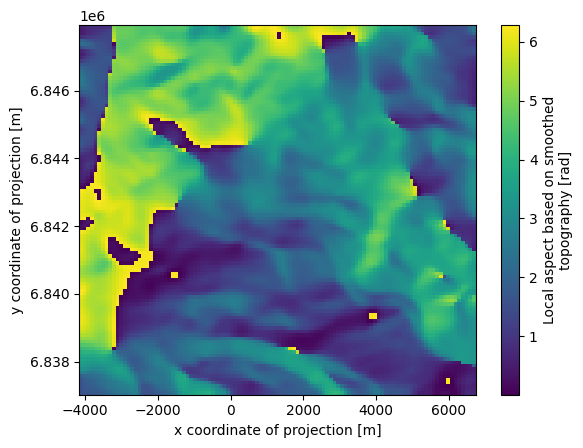

In [8]:
import xarray as xr

filepath_oggm = 'C:/Users/kasj/ML_MB_Norway/Data/oggm_data/per_glacier/train/RGI60-08.01126/gridded_data.nc'

with xr.open_dataset(filepath_oggm) as ds_grid_out:
    ds_grid = ds_grid_out
    
ds_grid.aspect.plot()

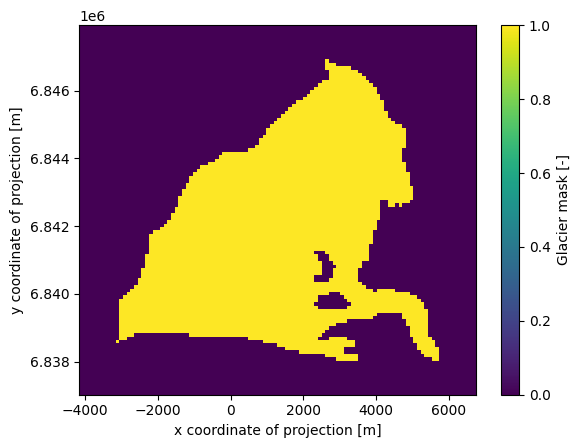

In [7]:
ds_grid.glacier_mask.plot()